In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


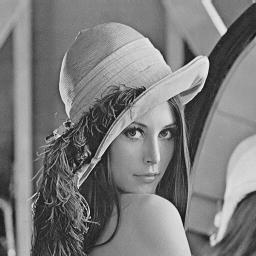

In [3]:
#img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/abcdef.bmp')
img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
cv2_imshow(gImg1)

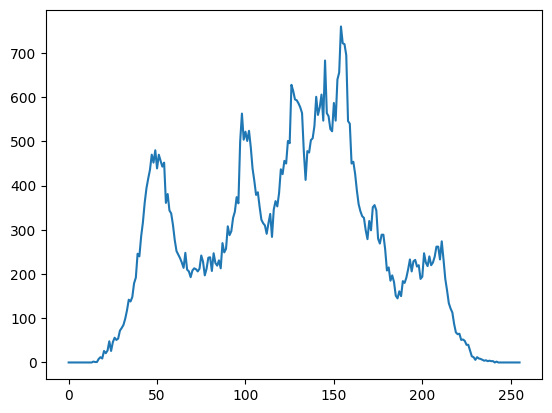

In [5]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 255])
plt.plot(hist)

(360, 360)


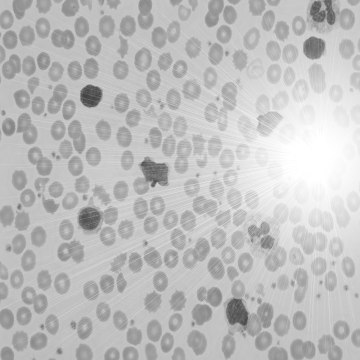

In [29]:
#img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/rice.bmp')
#img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/cell.bmp')
img = cv2.imread('/content/gdrive/My Drive/opencv colab/img/cell-bright.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)
print(gImg1.shape)
cv2_imshow(gImg1)

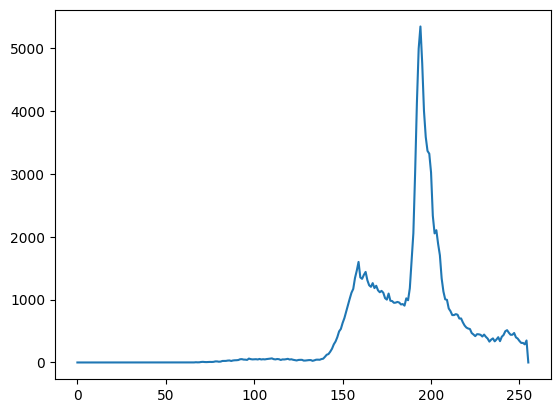

In [30]:
hist = cv2.calcHist([gImg1], [0], None, [256], [0, 255])
plt.plot(hist)

In [31]:
gBin = np.zeros((gImg1.shape[0], gImg1.shape[1]))

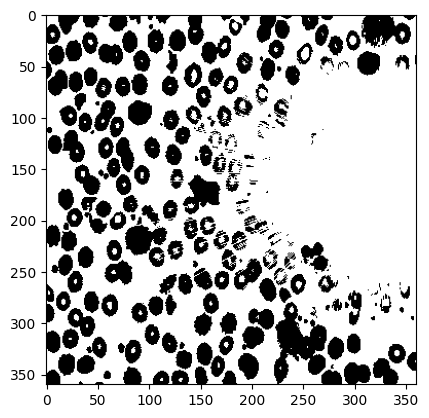

In [32]:
T = 180

for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if gImg1[h, w] > T:
      gBin[h, w] = 255
    else:
      gBin[h, w] = 0

plt.imshow(gBin, cmap = 'gray')
##cv2_imshow(gBin)

In [34]:
T1 = 50
T2 = 0
T0 = 1
outImg = np.zeros((gImg1.shape[0], gImg1.shape[1]))

In [45]:
def threshold_update(h, w, img, output, T1):
  sum1 = 0
  count1 = 0
  sum2 = 0
  count2 = 0

  for h in range(img.shape[0]):
    for w in range(img.shape[1]):
      if(output[h,w] == 255):
        sum1 = sum1 + img[h,w]
        count1 = count1 + 1
      else:
        sum2 = sum2 + img[h,w]
        count2 = count2 + 1

  avg1 = sum1 / count1
  avg2 = sum2 / count2

  T2 = np.int32(avg1 + avg2)/2
  return T2

In [46]:
for h in range(gImg1.shape[0]):
  for w in range(gImg1.shape[1]):
    if (gImg1[h, w] > T1):
      outImg[h, w] = 255
    else:
      outImg[h, w] = 0

In [47]:
while True:
  T2 = threshold_update(gImg1.shape[0], gImg1.shape[1], gImg1, outImg, T1)

  if(np.abs(T2-T1) < T0):
      for w in range(gImg1.shape[1]):
        if (gImg1[h, w] > T1):
         outImg[h, w] = 255
        else:
         outImg[h, w] = 0
        break;
  else:
    T1 = T2
    for h in range(gImg1.shape[0]):
      for w in range(gImg1.shape[1]):
        if(gImg1[h, w] > T2):
          outImg[h, w] = 255
        else:
          outImg[h, w] = 0


ZeroDivisionError: division by zero